In [2]:
import numpy as np

from matplotlib import style as mstyle
mstyle.use('ggplot')
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [24]:
import random
import subprocess
import math

field = []

R = 1
# параметр b
T = 1.9
S = 0
P = 0

pr_cnt = 0.9
SIZE = 44

    
#функция генерирующая матрицу с начальными условиями
def first_gen():
    global pr_cnt
    play_grid = []
    #заполнение матрицы
    for i in range(SIZE):
        player_row = []
        for j in range(SIZE):
            if i == SIZE/2 and j == SIZE/2:
                pl = 0
            else:
                pl = 1
            player_row.append(pl)
        play_grid.append(player_row)
    play_grid = boundary(play_grid)
    return play_grid

#функция создающая периодичность н границах
def boundary(matrix):
    for i in range(2, SIZE-2):
    #строки
        matrix[0][i]=matrix[-4][i]
        matrix[1][i]=matrix[-3][i]
        matrix[-2][i]=matrix[2][i]
        matrix[-1][i]=matrix[3][i]
    #столбцы
        matrix[i][0]=matrix[i][-4]
        matrix[i][1]=matrix[i][-3]
        matrix[i][-2]=matrix[i][2]
        matrix[i][-1]=matrix[i][3]
    matrix[0][0]=matrix[-4][-4]
    matrix[1][1]=matrix[-3][-3]
    matrix[0][1]=matrix[-4][-3]
    matrix[1][0]=matrix[-3][-4]
    
    matrix[-1][-1]=matrix[3][3]
    matrix[-2][-2]=matrix[2][2]
    matrix[-2][-1]=matrix[2][3]
    matrix[-1][-2]=matrix[3][2]
    
    matrix[0][-2]=matrix[-4][2]
    matrix[0][-1]=matrix[-4][3]
    matrix[1][-2]=matrix[-3][2]
    matrix[1][-1]=matrix[-3][3]
    
    matrix[-2][0]=matrix[2][-4]
    matrix[-1][0]=matrix[3][-4]
    matrix[-2][1]=matrix[2][-3]
    matrix[-1][1]=matrix[3][-3]	
    return matrix;

#игра между двумя игроками
def game(play_grid, i, j):
    global T, R
    game_list = []
    #выбирается центральный игрок
    #print "The player is ", play_grid[i][j], i,j
    #вывод соседей
    #print ""
    #print play_grid[i-1][j-1],play_grid[i-1][j],play_grid[i-1][j+1]
    #print play_grid[i][j-1],play_grid[i][j],play_grid[i][j+1]
    #print play_grid[i+1][j-1],play_grid[i+1][j],play_grid[i+1][j+1]
    #print ""
    #собираем 8 его соседей(их стратегии)
    place = 0
    for c in range(3):
        for k in range(3):
            game_list.append(play_grid[i-1+k][j-1+c])
    #print game_list
    #вычисление формулы вероятности, что в след поколении на этом месте будет кооператор
    Csum, Dsum = 0, 0
    if play_grid[i][j] == 1:
        for element in game_list:
            if element == 1:
                Csum += R
        return Csum
    else:
        for element in game_list:
            if element == 1:
                Dsum += T
        return Dsum   

def printf(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            print (matrix[i][j], end=" ")
        print (" ")

#эксперимент за дискретное число шагов t
def generations(matrix):
    new_matrix = []
    for col in range(SIZE):
        raw = []
        for r in range(SIZE):
            raw.append(0)
        new_matrix.append(raw)
   
    for i in range(2,SIZE-2):
        for j in range(2,SIZE-2):
            payoff_lst = []
            game_list = []
            for c in range(3):
                for k in range(3):
                    game_list.append(matrix[i-1+k][j-1+c])
                    payoff_lst.append(game(matrix, i-1+k, j-1+c))
            new_matrix[i][j] = game_list[payoff_lst.index(max(payoff_lst))]            
    new_matrix = boundary(new_matrix)
	#считаем соотношение кооператоров в новой матрице        
    return new_matrix


In [18]:
def animate_field(frames=100):
    fig, ax = plt.subplots()
    ax.set_xlim(3, field.shape[0]-2)
    ax.set_ylim(3, field.shape[1]-2)
    ax.set_aspect('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    x, y = np.nonzero(field)
    img, = ax.plot(x, y, 'mo', ms=10, alpha=0.5)

    def init():
        img.set_xdata([])
        img.set_ydata([])
        return img,

    def animate(i):
        global field
        field = np.array(generations(field))
        x, y = np.nonzero(field)
        img.set_xdata(x)
        img.set_ydata(y)
        return img,

    ani = animation.FuncAnimation(fig, animate, init_func=init, interval=350)
    
    return ani

<IPython.core.display.Javascript object>


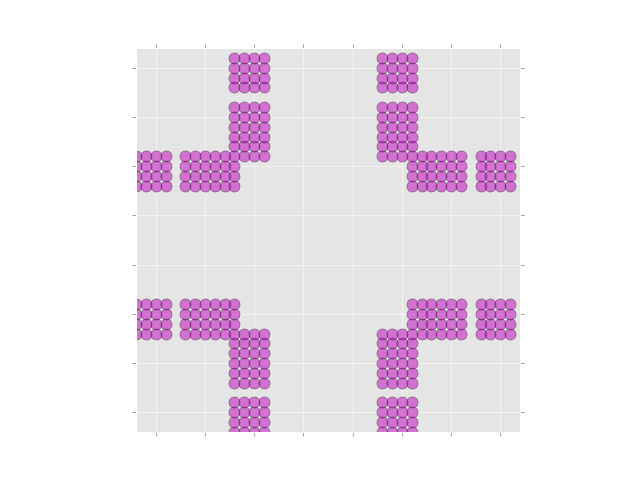

In [25]:
field = first_gen()
field = np.array(generations(field))
ani = animate_field(1500)
plt.show()